In [1]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_box(xr, yr, **kwargs):
    return plt.fill([xr[0], xr[1], xr[1], xr[0], xr[0]],
                    [yr[0], yr[0], yr[1], yr[1], yr[0]], **kwargs)
def plot_dreach_box(box, t0, **kwargs):
    return plot_box(t0 + np.array(box["time"]), np.array(box["enclosure"]), **kwargs)

In [3]:
def plot_dreach(data, var, **kwargs):
    t0 = 0
    for step in data["traces"]:
        if step is None:
            continue
        vardict = next(x for x in step if x["key"].startswith(var + "_"))
        boxes = vardict["values"]
        for i in range(len(boxes)-1):
            boxes[i]["time"][1] = boxes[i+1]["time"][0]
        for box in boxes:
            plt_obj, = plot_dreach_box(box, t0, **kwargs)
        t0 = t0 + boxes[-1]["time"][-1]
    return plt_obj

def plot_modes(data, **kwargs):
    t = [0]
    for step in data["traces"]:
        if step is None:
            t.append(t[-1])
            plt.plot([t[-1],t[-1]], [-100,100], **kwargs)
            continue
        plt.plot([t[-1],t[-1]], [-100,100], **kwargs)
        t.append(t[-1] + step[0]["values"][-1]["time"][-1])
    for i in range(len(t)-1):
        center = (t[i] + t[i+1]) / 2.0
        if data["traces"][i]:
            plt.text(center, 1.02*plt.gca().get_ylim()[-1], data["traces"][i][0]["mode"], fontsize=30, color="green")

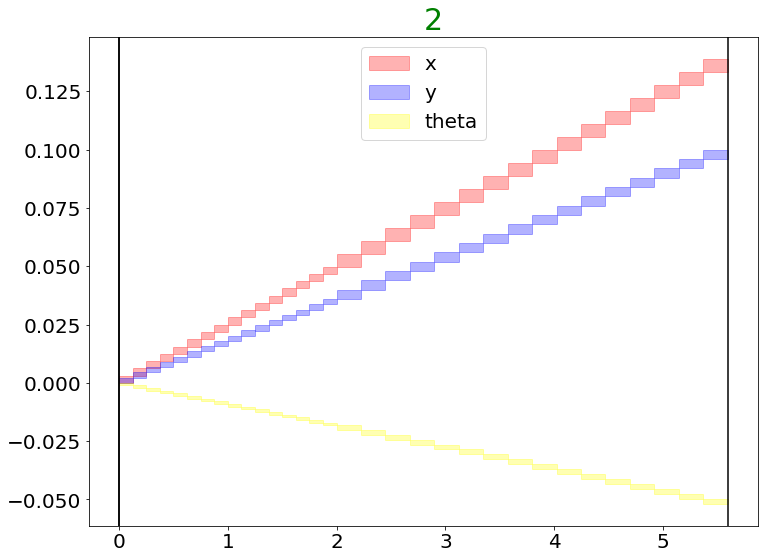

In [6]:
with open("pusher_robot_2_0.smt2.json") as f:
    data = json.loads(f.read())

plt.figure(figsize=(12,9))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
x = plot_dreach(data, "x", color="red", alpha=0.3)
y = plot_dreach(data, "y", color="blue", alpha=0.3)
theta = plot_dreach(data, "theta", color="yellow", alpha=0.3)
plt.gca().set_autoscale_on(False)
plot_modes(data, color="black")
plt.legend([x, y, theta], ["x", "y", "theta"], fontsize=20)
plt.savefig("manip2.png")

In [10]:
data["traces"][0] is None

True

In [23]:
data["traces"][1][0]["values"]

[{u'enclosure': [0, 0.062521791382725], u'time': [0, 0.10003486621236]},
 {u'enclosure': [0.0624607349458278, 0.12504358276545],
  u'time': [0.10003486621236, 0.20006973242472]},
 {u'enclosure': [0.124921469891656, 0.187565374148175],
  u'time': [0.20006973242472, 0.30010459863708]},
 {u'enclosure': [0.187382204837484, 0.2500871655309],
  u'time': [0.30010459863708, 0.40013946484944]},
 {u'enclosure': [0.249842939783311, 0.312608956913625],
  u'time': [0.40013946484944, 0.5001743310618]},
 {u'enclosure': [0.312303674729139, 0.37513074829635],
  u'time': [0.5001743310618, 0.60020919727416]},
 {u'enclosure': [0.374764409674967, 0.437652539679075],
  u'time': [0.60020919727416, 0.700244063486521]},
 {u'enclosure': [0.437225144620795, 0.500174331061801],
  u'time': [0.700244063486521, 0.800278929698881]},
 {u'enclosure': [0.499685879566623, 0.562696122444526],
  u'time': [0.800278929698881, 0.900313795911241]},
 {u'enclosure': [0.562146614512451, 0.625217913827251],
  u'time': [0.900313795